# Sink depth of a dredgebot in various soiltypes

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Latex, Math
import warnings
warnings.filterwarnings('ignore')

from AOD.Unit import ureg, Q_
from AOD.Material import *
from AOD.Model import *
from AOD.Bot import *

model = Model()

## Dimensions of a dredgebot

In [2]:
model.bot.weight_dry = 5.1e3 * ureg['kg']
model.bot.no_screw = 2
for s in model.bot.Screws:
    s.cylinder.d = 0.6 * ureg['m']
    s.cylinder.l = 1.92 * ureg['m']
    for h in s.Helices:
        h.p = 0.478 * ureg['m']
        h.h = 0.1 * ureg['m']

## Sinkage depth in Silt

In [3]:
model.world.Layers['Soil'] = Silt()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3 
Cohesion: 3000.0 pascal 
int. friction angle (phi): 0.0 degree
coeff of lateral earth pressure: 0.54 dimensionless
external friction angle: 0.0 dimensionless
In-situ density: 1300.0 kilogram / meter ** 3


Sink depth in silt: 0.135 meter


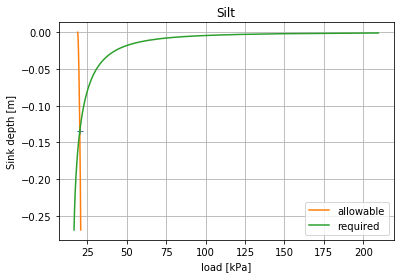

In [4]:
[p_allow, p_load, depth, sink_depth, load] = model.solve_sinkdepth()
print('Sink depth in silt: ' + str(sink_depth))

plt.figure()
plt.grid(True)
plt.plot(load/1e3, -sink_depth, '+')
plt.plot(p_allow/1e3, -depth, label='allowable')
plt.plot(p_load/1e3, -depth, label='required')
plt.title('Silt')
plt.ylabel('Sink depth [m]')
plt.xlabel('load [kPa]')
plt.legend()
plt.show()

## Sinkage depth in loosly packed clay

In [5]:
model.world.Layers['Soil'] = Loose_clay()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3 
Cohesion: 5000.0 pascal 
int. friction angle (phi): 0.0 degree
coeff of lateral earth pressure: 0.0 dimensionless
external friction angle: 0.0 dimensionless
In-situ density: 1400.0 kilogram / meter ** 3


Sink depth in loosly packed clay: 0.045 meter


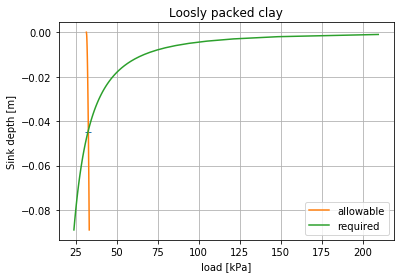

In [6]:
[p_allow, p_load, depth, sink_depth, load] = model.solve_sinkdepth()
print('Sink depth in loosly packed clay: ' + str(sink_depth))

plt.figure()
plt.grid(True)
plt.plot(load/1e3, -sink_depth, '+')
plt.plot(p_allow/1e3, -depth, label='allowable')
plt.plot(p_load/1e3, -depth, label='required')
plt.title('Loosly packed clay')
plt.ylabel('Sink depth [m]')
plt.xlabel('load [kPa]')
plt.legend()
plt.show()

## Sinkage depth in packed clay

In [7]:
model.world.Layers['Soil'] = Packed_clay()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3 
Cohesion: 10000.0 pascal 
int. friction angle (phi): 0.0 degree
coeff of lateral earth pressure: 1.0 dimensionless
external friction angle: 0.0 dimensionless
In-situ density: 1800.0 kilogram / meter ** 3


Sink depth in packed clay: 0.011 meter


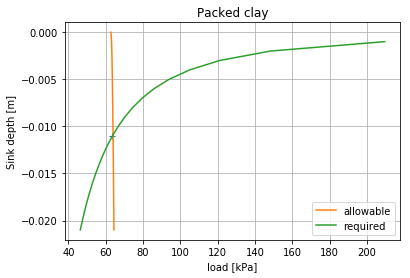

In [8]:
[p_allow, p_load, depth, sink_depth, load] = model.solve_sinkdepth()
print('Sink depth in packed clay: ' + str(sink_depth))

plt.figure()
plt.grid(True)
plt.plot(load/1e3, -sink_depth, '+')
plt.plot(p_allow/1e3, -depth, label='allowable')
plt.plot(p_load/1e3, -depth, label='required')
plt.title('Packed clay')
plt.ylabel('Sink depth [m]')
plt.xlabel('load [kPa]')
plt.legend()
plt.show()

## Sinkage depth in Sand

In [9]:
model.world.Layers['Soil'] = Sand()
print(str(model.world.Layers['Soil']))

Properties at 15 degC
density: 2650.0 kilogram / meter ** 3 
Cohesion: 0.0 pascal 
int. friction angle (phi): 35.0 degree
coeff of lateral earth pressure: 0.0 dimensionless
external friction angle: 0.0 dimensionless
In-situ density: 2000.0 kilogram / meter ** 3


Sink depth in sand: 0.018 meter


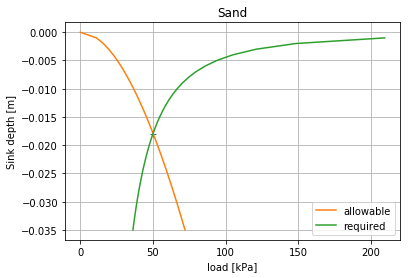

In [10]:
[p_allow, p_load, depth, sink_depth, load] = model.solve_sinkdepth()
print('Sink depth in sand: ' + str(sink_depth))

plt.figure()
plt.grid(True)
plt.plot(load/1e3, -sink_depth, '+')
plt.plot(p_allow/1e3, -depth, label='allowable')
plt.plot(p_load/1e3, -depth, label='required')
plt.title('Sand')
plt.ylabel('Sink depth [m]')
plt.xlabel('load [kPa]')
plt.legend()
plt.show()